## Data Mining ELA 5 - BY SHREYA RAJPAL 21BBS0202

### QUESTIONS 
1. Consider the TATA MOTORS shares data from National stock exchange for the past 7
years. Implement the AutoRegressive Integrated Moving Average (ARIMA) model on the
data and identify the 50 days moving average(MA), 200 days MA, 365 days MA and 500
days MA. Summarize the autocorrelations detected from the model.
2. Implement the Logistic regression for predicting the Possibility of enrolling into a university.
The dataset can determine the probability of a student getting accepted to a particular university
or a degree course in a college by studying the relationship between the estimator variables,
such as
CGPA,
GRE, GMAT, or TOEFL scores,
Research articles (conferences, journals published)
Mini project experience
Internship completed

C:\Users\Shreya Rajpal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shreya Rajpal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shreya Rajpal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shreya Rajpal\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but i

ARIMA Summary for Original Price:

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 1668
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5980.564
Date:                Sun, 17 Nov 2024   AIC                          11973.128
Time:                        21:39:44   BIC                          12005.641
Sample:                             0   HQIC                         11985.176
                               - 1668                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0116      0.018     -0.643      0.520      -0.047       0.024
ar.L2          0.0307      0.019      1.592      0.111      -0.007       0.068
ar.L3         -0.

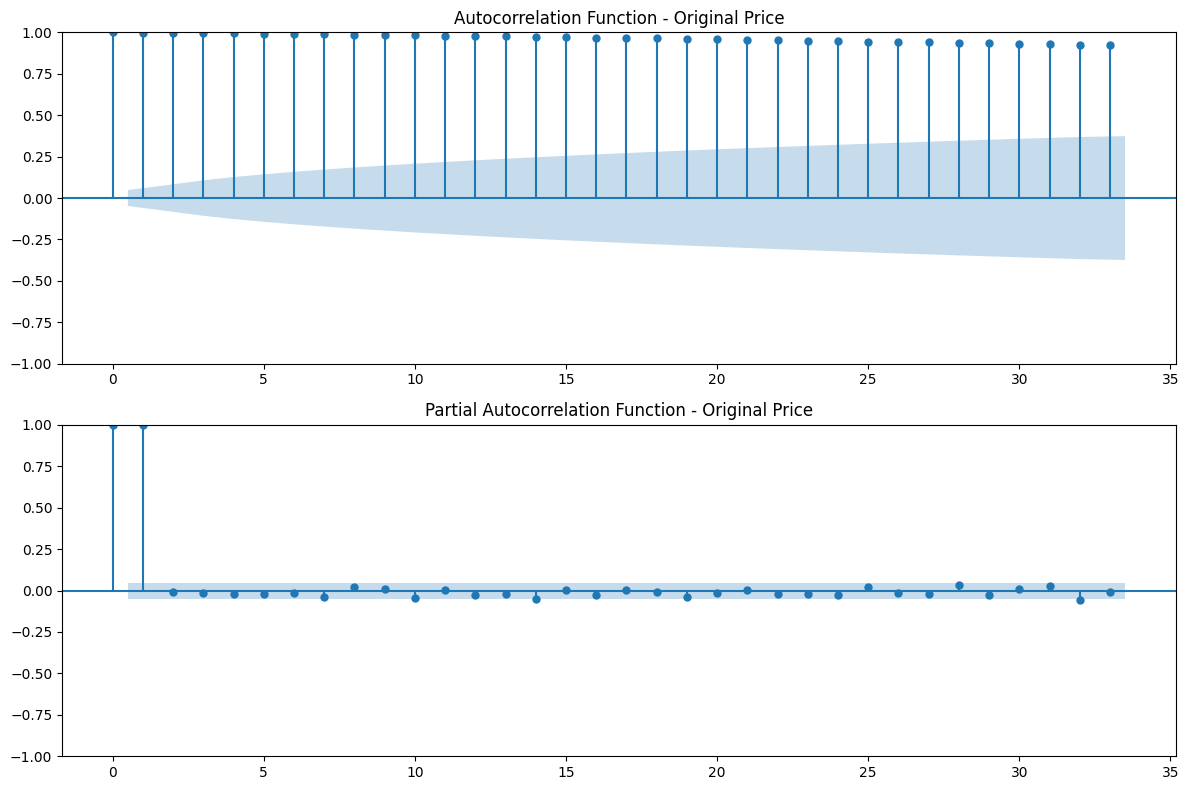

In [2]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the dataset
file_path = 'TAMO Historical Data.csv'
data = pd.read_csv(file_path)

# Preprocessing
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data = data.sort_values(by='Date')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data = data.dropna(subset=['Price'])
data.set_index('Date', inplace=True)

# Calculate moving averages
data['50_Days_MA'] = data['Price'].rolling(window=50).mean()
data['200_Days_MA'] = data['Price'].rolling(window=200).mean()
data['365_Days_MA'] = data['Price'].rolling(window=365).mean()
data['500_Days_MA'] = data['Price'].rolling(window=500).mean()

# Function to fit ARIMA model
def fit_arima(series, order):
    model = ARIMA(series.dropna(), order=order)
    return model.fit()

# Define ARIMA order
order = (5, 1, 0)

# Fit ARIMA models
results = {
    'Original Price': fit_arima(data['Price'], order),
    '50 Days MA': fit_arima(data['50_Days_MA'], order),
    '200 Days MA': fit_arima(data['200_Days_MA'], order),
    '365 Days MA': fit_arima(data['365_Days_MA'], order),
    '500 Days MA': fit_arima(data['500_Days_MA'], order),
}

# Print summaries for all ARIMA models
for name, result in results.items():
    print(f"ARIMA Summary for {name}:\n")
    print(result.summary())
    print("\n" + "="*80 + "\n")

# Plot ACF and PACF for the original price
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(data['Price'].dropna(), ax=ax[0])
ax[0].set_title('Autocorrelation Function - Original Price')

plot_pacf(data['Price'].dropna(), ax=ax[1])
ax[1].set_title('Partial Autocorrelation Function - Original Price')

plt.tight_layout()
plt.show()
